In [ ]:
# Colab: mount drive once per session
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

segments = ["MIRPUR_10_A","FARMGATE_FLYOVER","MOHAKHALI_BUS_STOP",
            "SHAHBAG_SIGNAL","BASHUNDHARA_GATE","JATRABARI_CHOWRASTA"]

def generate_samples_per_slot(segments, n_peak=500, n_offpeak=500):
    rows = []

    # Peak rows
    for _ in range(n_peak):
        segment = np.random.choice(segments)
        vehicle_count = np.random.randint(100, 300)
        avg_travel_time = round((vehicle_count/10)+np.random.normal(5,3),2)
        weather = np.random.choice(["Clear","Rain","Fog"], p=[0.7,0.25,0.05])
        rows.append({
            "timestamp": datetime.now(),
            "segment_id": segment,
            "time_slot": "Peak",
            "vehicle_count": vehicle_count,
            "avg_travel_time_min": avg_travel_time,
            "weather": weather
        })

    # OffPeak rows
    for _ in range(n_offpeak):
        segment = np.random.choice(segments)
        vehicle_count = np.random.randint(20, 120)  # Fixed range
        avg_travel_time = round((vehicle_count/10)+np.random.normal(5,3),2)
        weather = np.random.choice(["Clear","Rain","Fog"], p=[0.7,0.25,0.05])
        rows.append({
            "timestamp": datetime.now(),
            "segment_id": segment,
            "time_slot": "OffPeak",
            "vehicle_count": vehicle_count,
            "avg_travel_time_min": avg_travel_time,
            "weather": weather
        })

    df = pd.DataFrame(rows)
    return df

# Generate dataset
df = generate_samples_per_slot(segments, n_peak=500, n_offpeak=500)

# Save to Google Drive
df.to_csv("/content/drive/MyDrive/dhaka_real_time_stream.csv", index=False)

# Check counts
print(df['time_slot'].value_counts())


time_slot
Peak       500
OffPeak    500
Name: count, dtype: int64


In [ ]:
acc_path = "/content/drive/MyDrive/simulation lab test/dhaka_accident_data.csv"
acc = pd.read_csv(acc_path)

Chi2 statistic: 9.82
p-value: 0.4568
Degrees of freedom: 10
Decision: p >= 0.05 → Accident severity is INDEPENDENT of the combination of weather and road type.


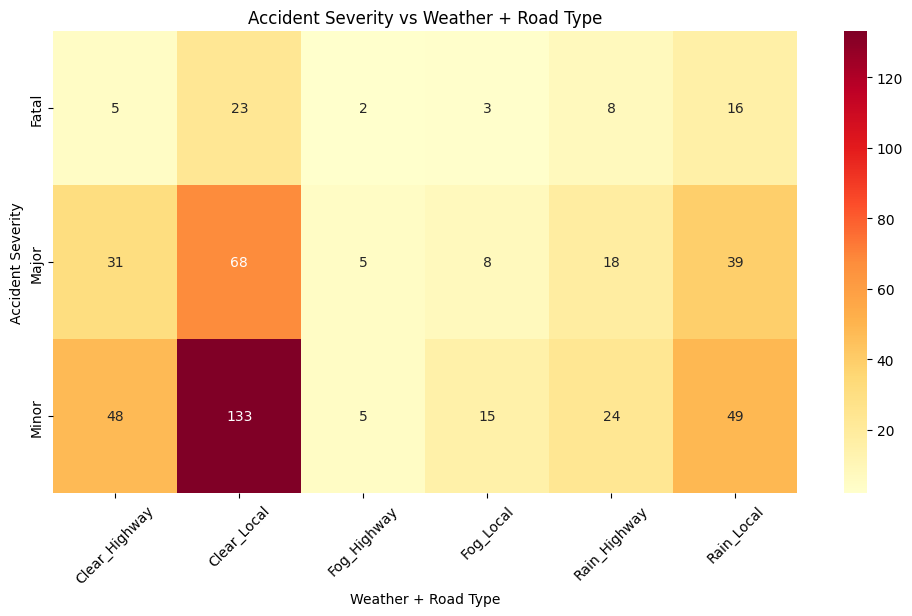

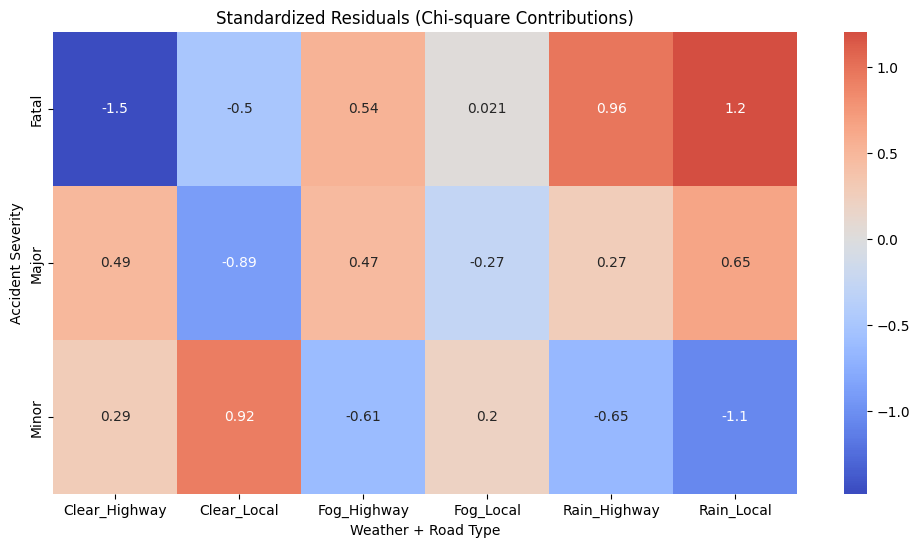

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
acc['weather_road'] = acc['weather'] + "_" + acc['road_type']

# Crosstab: accident severity vs weather_road
ct = pd.crosstab(acc['accident_severity'], acc['weather_road'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ct)

# Print results
print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

# Decision
if p < 0.05:
    print("Decision: p < 0.05 → Accident severity DEPENDS on the combination of weather and road type.")
else:
    print("Decision: p >= 0.05 → Accident severity is INDEPENDENT of the combination of weather and road type.")

# Heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Accident Severity vs Weather + Road Type")
plt.ylabel("Accident Severity")
plt.xlabel("Weather + Road Type")
plt.xticks(rotation=45)
plt.show()

residuals = (ct - expected) / np.sqrt(expected)

plt.figure(figsize=(12,6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0)
plt.title("Standardized Residuals (Chi-square Contributions)")
plt.xlabel("Weather + Road Type")
plt.ylabel("Accident Severity")
plt.show()


In [49]:
from scipy import stats

peak = df[df['time_slot']=="Peak"]['avg_travel_time_min']
off = df[df['time_slot']=="OffPeak"]['avg_travel_time_min']

tstat, p_t = stats.ttest_ind(peak, off, equal_var=False)
print("T-statistic:", tstat)
print("p-value:", p_t)

if p_t < 0.05:
    print("Decision: Peak travel times are significantly higher than OffPeak.")
else:
    print("Decision: No significant difference between Peak and OffPeak.")


T-statistic: 36.56856733689703
p-value: 1.650596702375402e-174
Decision: Peak travel times are significantly higher than OffPeak.


In [50]:
empirical = peak.values
n_sim = 10000
sim_means = [np.mean(np.random.choice(empirical, size=len(empirical), replace=True)) for _ in range(n_sim)]
threshold = 25
prob_exceed = np.mean(np.array(sim_means) > threshold)
print("Probability avg travel time > 25 min:", prob_exceed)


Probability avg travel time > 25 min: 0.0942


In [51]:
count_exceed = 0
for _ in range(n_sim):
    sample = np.random.choice(empirical, size=len(empirical), replace=True)
    mean_sample = np.mean(sample)
    if mean_sample > 25:
        count_exceed += 1


prob_exceed = np.mean(np.array(sim_means) > threshold)

print(prob_exceed)


0.0942


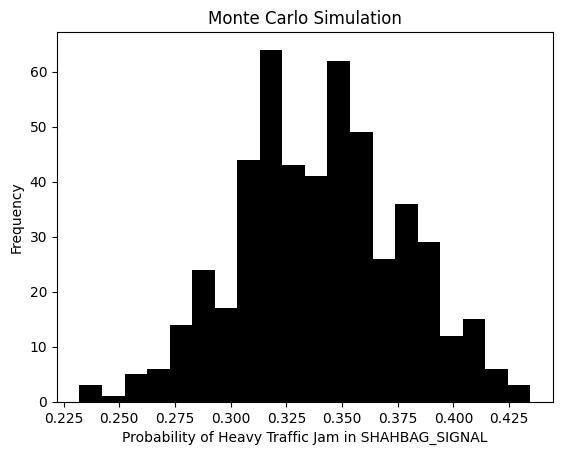

In [60]:
import matplotlib.pyplot as plt
zone_name = 'SHAHBAG_SIGNAL'
# Filter data for the specified zone
zone_traffic = df[df['segment_id'] == zone_name]

if not zone_traffic.empty:
    jam_threshold = 160
    sim_runs = 500
    jam_probs = []
    n_samples = len(zone_traffic)
    for _ in range(sim_runs):
        sample = zone_traffic['vehicle_count'].sample(n=n_samples, replace=True).values
        jam_prob = np.mean(sample > jam_threshold)
        jam_probs.append(jam_prob)
    plt.hist(jam_probs, bins=20, color='black')
    plt.xlabel(f'Probability of Heavy Traffic Jam in {zone_name}')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation')
    plt.show()
else:
    print(f"No data available for {zone_name}, cannot run simulation.")

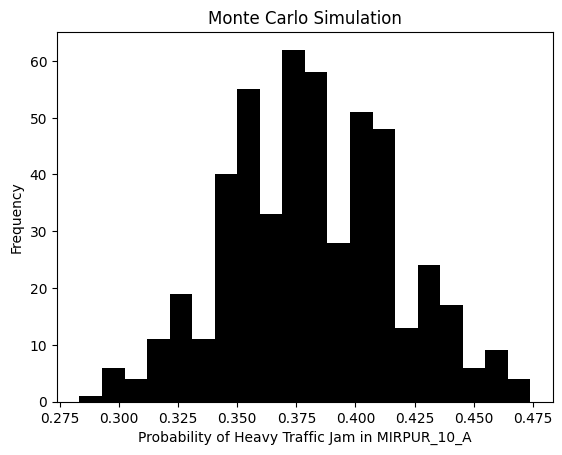

In [62]:

zone_name = 'MIRPUR_10_A'
# Filter data for the specified zone
zone_traffic = df[df['segment_id'] == zone_name]

if not zone_traffic.empty:
    jam_threshold = 160
    sim_runs = 500
    jam_probs = []
    n_samples = len(zone_traffic)
    for _ in range(sim_runs):
        sample = zone_traffic['vehicle_count'].sample(n=n_samples, replace=True).values
        jam_prob = np.mean(sample > jam_threshold)
        jam_probs.append(jam_prob)
    plt.hist(jam_probs, bins=20, color='black')
    plt.xlabel(f'Probability of Heavy Traffic Jam in {zone_name}')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation')
    plt.show()
else:
    print(f"No data available for {zone_name}, cannot run simulation.")